# Figure 1 and Figure 2 in Main Text

This notebook contains the code for both of the figures contained in the main text. Note that while the .png file is not availiable in github, the jupyter notebook contains an image.


### Imports and Child Data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
current_dir = %pwd
if not current_dir == '/home/melissa/Dropbox/experiments/python/':
    %cd '/home/melissa/Dropbox/experiments/python/'

/home/melissa/Dropbox/experiments/python


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import seaborn as sns
from statannot import add_stat_annotation

In [3]:
homedir = "/home/melissa/Dropbox/experiments/python/current_projects/jcl_multisyllabic_neighborhoods_2021/"
datadir = "data/combined/"
data = Path(homedir+datadir)
outdir = Path(homedir+"data/images")

In [4]:
convert = {'PACT':'float64','Pct Child':'float64','Pct Adult':'float64',
           'len_syllables':'int32','ND':'int32', 'SOND':'int32'}
data3 = pd.read_pickle(data/'data3.pickle')
data3 = data3.astype(convert)
data4 = pd.read_pickle(data/'data4.pickle')
data4 = data4.astype(convert)
data6 = pd.read_pickle(data/'data6.pickle')
data6 = data6.astype(convert)

# Figure 1: Neighborhood Measures

Caption: Violin plots of neighborhood measures for CVC (A) and multisyllabic (B1-B4) words used by children and adults at ages three, four and six years. Original ND (B1) produces few neighbors for multisyllabic words (no neighbors for 69.1% at age three, 68.9% at age four and 67.4% at age six years), while the alternative neighborhood measures (B2-B4) produce more varied distribution of values. 

### Aggregate Data
To create violin plots in seaborn, "melted" dataframes are required.

In [5]:
i3 = set(list(data3.index.values))
i4 = set(list(data4.index.values))
i6 = set(list(data6.index.values))
alli = i3 | i4 | i6

In [6]:
sim = 'ND'            
phon_cvc = pd.DataFrame(columns=['Three','Four','Six'],index=alli)
phon_cvc['Three'] = data3[sim][data3.iscvc]
phon_cvc['Four'] = data4[sim][data4.iscvc]
phon_cvc['Six'] = data6[sim][data6.iscvc]
phon_cvc_melt = phon_cvc.melt()

In [7]:
sim = 'ND'            
phon_multi = pd.DataFrame(columns=['Three','Four','Six'],index=alli)
phon_multi['Three'] = data3[sim][data3.ismulti]
phon_multi['Four'] = data4[sim][data4.ismulti]
phon_multi['Six'] = data6[sim][data6.ismulti]
phon_multi_melt = phon_multi.melt()

In [8]:
sim = 'SOND'            
son = pd.DataFrame(columns=['Three','Four','Six'],index=alli)
son['Three'] = data3[sim][data3.ismulti]
son['Four'] = data4[sim][data4.ismulti]
son['Six'] = data6[sim][data6.ismulti]
son_melt = son.melt()

In [9]:
sim = 'PLD20'         
pld20 = pd.DataFrame(columns=['Three','Four','Six'],index=alli)
pld20['Three'] = data3[sim][data3.ismulti]
pld20['Four'] = data4[sim][data4.ismulti]
pld20['Six'] = data6[sim][data6.ismulti]
pld20_melt = pld20.melt()

In [10]:
sim = 'PFEAT20'            
pfeat = pd.DataFrame(columns=['Three','Four','Six'],index=alli)
pfeat['Three'] = data3[sim][data3.ismulti]
pfeat['Four'] = data4[sim][data4.ismulti]
pfeat['Six'] = data6[sim][data6.ismulti]
pfeat_melt = pfeat.melt()

### Create Plot

Original submitted to paper

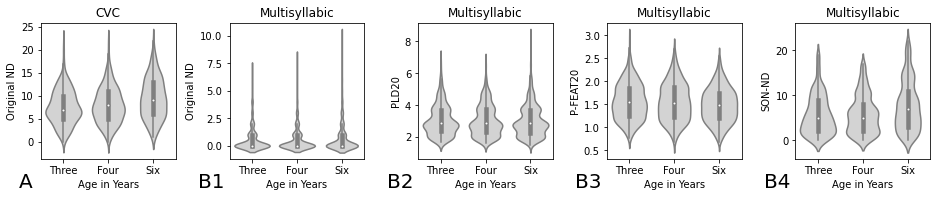

In [11]:
colors = ["black", "black", "black"]
gray = ['lightgray','lightgray','lightgray']
alp=.1
jit = .3
fig, axs = plt.subplots(ncols=5,figsize=(13,3))

# box plots
e0 = sns.violinplot(x='variable', y='value', data=phon_cvc_melt, ax=axs[0],
                palette =gray)

e1 = sns.violinplot(x='variable', y='value', data=phon_multi_melt, ax=axs[1],
                palette =gray)

e3 = sns.violinplot(x='variable', y='value', data=pld20_melt, ax=axs[2],
                palette =gray)

e4 = sns.violinplot(x='variable', y='value', data=pfeat_melt, ax=axs[3],
                palette =gray)

e2 = sns.violinplot(x='variable', y='value', data=son_melt, ax=axs[4],
                palette =gray)

#letter labels
axs[0].text(-1, -10, "A", fontsize=20)
axs[0].text(3, -10, "B1", fontsize=20)
axs[0].text(7.2, -10, "B2", fontsize=20)
axs[0].text(11.4, -10, "B3", fontsize=20)
axs[0].text(15.6, -10, "B4", fontsize=20)

#plt.close(e0.fig);plt.close(e1.fig);plt.close(e2.fig)
#plt.close(e3.fig), plt.close(e4.fig)

for x in range(0,5): 
        axs[x].set_xlabel('Age in Years')
axs[0].set_title('CVC')
for x in range(1,5): 
        axs[x].set_title('Multisyllabic')

axs[0].set_ylabel('Original ND')
axs[1].set_ylabel('Original ND')
axs[2].set_ylabel('PLD20')
axs[3].set_ylabel('P-FEAT20')
axs[4].set_ylabel('SON-ND')


plt.subplots_adjust(wspace=.4,left=.04,right=.99,bottom=.25)
plt.savefig(outdir/"similarity.png")
plt.savefig(outdir/"similarity_1200dpi.png", dpi=1200)
plt.savefig(outdir/"similarity_vector.svg")


## Edited based on typesetting proof

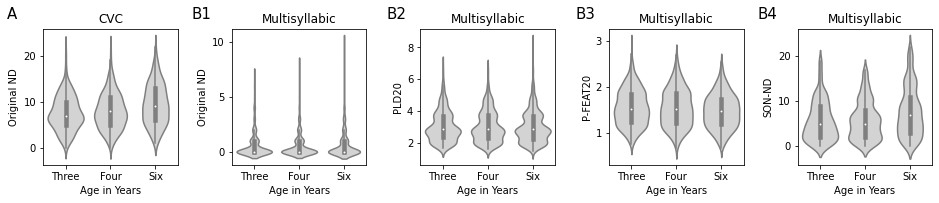

In [80]:
colors = ["black", "black", "black"]
gray = ['lightgray','lightgray','lightgray']
alp=.1
jit = .3

fig, axs = plt.subplots(ncols=5,figsize=(13,3))

# box plots
a0 = sns.violinplot(x='variable', y='value', data=phon_cvc_melt, ax=axs[0],
                palette =gray)
a0.locator_params(axis='y', nbins=3)


b1 = sns.violinplot(x='variable', y='value', data=phon_multi_melt, ax=axs[1],
                palette =gray)
b1.locator_params(axis='y', nbins=3)


b2 = sns.violinplot(x='variable', y='value', data=pld20_melt, ax=axs[2],
                palette =gray)
b2.locator_params(axis='y', nbins=5)

b3 = sns.violinplot(x='variable', y='value', data=pfeat_melt, ax=axs[3],
                palette =gray)
b3.locator_params(axis='y', nbins=3)

b4 = sns.violinplot(x='variable', y='value', data=son_melt, ax=axs[4],
                palette =gray)



for x in range(0,5): 
        axs[x].set_xlabel('Age in Years')
axs[0].set_title('CVC')
for x in range(1,5): 
        axs[x].set_title('Multisyllabic')

axs[0].set_ylabel('Original ND')
axs[1].set_ylabel('Original ND')
axs[2].set_ylabel('PLD20')
axs[3].set_ylabel('P-FEAT20')
axs[4].set_ylabel('SON-ND')

#letter labels
yval = 28
fs = 15
axs[0].text(-1.3, yval, "A", fontsize=fs)
axs[0].text(2.8, yval, "B1", fontsize=fs)
axs[0].text(7.15, yval, "B2", fontsize=fs)
axs[0].text(11.35, yval, "B3", fontsize=fs)
axs[0].text(15.4, yval, "B4", fontsize=fs)


plt.subplots_adjust(wspace=.4,left=.04,right=.99,bottom=.25)
plt.savefig(outdir/"similarity_dpi1200.png")
plt.savefig(outdir/"similarity_vector.svg")


### Other calculations

Also included in the figure caption is the percentage of multisyllabic words that have no neighbors:

In [12]:
no3 = np.sum(phon_multi.Three[np.isfinite(phon_multi.Three)] == 0) / len(phon_multi.Three[np.isfinite(phon_multi.Three)])
no4 = np.sum(phon_multi.Four[np.isfinite(phon_multi.Four)] == 0) / len(phon_multi.Four[np.isfinite(phon_multi.Four)])
no6 = np.sum(phon_multi.Six[np.isfinite(phon_multi.Six)] == 0) / len(phon_multi.Six[np.isfinite(phon_multi.Six)])

In [13]:
np.round([no3,no4,no6],3) * 100

array([69.1, 68.9, 67.4])

# Figure 2: Acquisition measure: the Proxy for Acquisition from Conversational Transcripts

Caption: When creating Proxy for Acquisition from Conversational Transcripts (PACT) values, A) the best fit quadratic curve is found between the logarithm of the percent transcripts for children and adults at each age (shown only at age four years). When examining the distributions of PACT values from words in common across all ages using a Wilcoxon test (with Bonferroni correction), (B) the CVC PACT values (n=319) did not differ significantly across ages, (C) but the multisyllabic PACT values (n=434) differed between ages four and age six years, and between ages three and age six years.  NOTE: ns = not significant, \*p < .05, **p<.01.

### Data for figure

In [14]:
logpcts = pd.DataFrame(columns=['Child','Adult'])
logpcts['Child'] = data4['Pct Child']
logpcts['Adult'] = data4['Pct Adult']

In [15]:
# CVC PACT
pact_cvc = pd.DataFrame(columns=['Three','Four','Six'],index=alli)
pact_cvc['Three'] = data3['PACT'][data3.iscvc]
pact_cvc['Four'] = data4['PACT'][data4.iscvc]
pact_cvc['Six'] = data6['PACT'][data6.iscvc]
pact_cvc_nonan = pact_cvc.dropna()
pact_cvc_melt = pact_cvc_nonan.melt()
len(pact_cvc_nonan)

319

In [16]:
# multisyllabic PACT
pact_multi = pd.DataFrame(columns=['Three','Four','Six'],index=alli)
pact_multi['Three'] = data3['PACT'][data3.ismulti]
pact_multi['Four'] = data4['PACT'][data4.ismulti]
pact_multi['Six'] = data6['PACT'][data6.ismulti]
pact_multi_nonan = pact_multi.dropna()
pact_multi_melt = pact_multi_nonan.melt()
len(pact_multi_nonan)

434

### Plotting figure

In [17]:
 def trendline(x1, y1, poly):
    p = np.polyfit(x1, y1, poly)
    xpoints = np.linspace(np.min(x1), np.max(x1), 100)
    ypoints = np.polyval(p,xpoints)
    return xpoints, ypoints

Original for paper

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
Three v.s. Four: Wilcoxon test (paired samples) with Bonferroni correction, P_val=6.300e-01 stat=4.392e+04
Using zero_method  wilcox
Four v.s. Six: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.089e-02 stat=4.014e+04
Using zero_method  wilcox
Three v.s. Six: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.079e-03 stat=3.787e+04


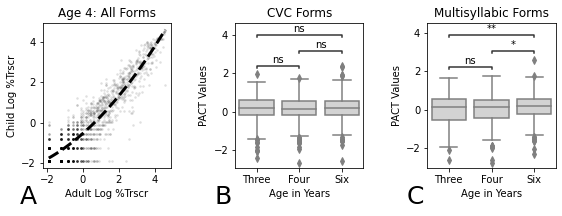

In [18]:
fig, ax = plt.subplots(1,3,figsize=(8,3))
alp = .05
jit = .3


# relationship with trendline
alp = .08
ax[0].scatter(x='Adult',y='Child',data=logpcts,alpha=alp,c='black',s=3)
bestx,besty = trendline(logpcts['Adult'][np.isfinite(data4['Pct Adult'])],
                        logpcts['Child'][np.isfinite(data4['Pct Adult'])],2)

ax[0].plot(bestx,besty,c='black',linestyle='--',lw=3);
ax[0].set_ylabel('Child Log %Trscr')
ax[0].set_xlabel('Adult Log %Trscr')
ax[0].set_title('Age 4: All Forms')

x = "variable"
y = "value"
order = ['Three', 'Four', 'Six']

# pact values - CVC
e2 = sns.boxplot(x='variable', y='value', data=pact_cvc_melt, ax=ax[1],
                 palette=['lightgray'])

tr = add_stat_annotation(ax[1], data=pact_cvc_melt, x=x, y=y, order=order,
                         box_pairs=[("Three", "Four"), ("Three", "Six"), ("Four", "Six")],
                         test='Wilcoxon', text_format='star',
                         loc='inside', verbose=0)

ax[1].set_ylabel('PACT Values')
ax[1].set_xlabel('Age in Years')
ax[1].set_title('CVC Forms')
#plt.close(e2.fig)
#plt.close(e3.fig)

# pact values - Multisyllabic
ax[2] = sns.boxplot(data=pact_multi_melt, x=x, y=y, order=order,palette=['lightgray'])
tr = add_stat_annotation(ax[2], data=pact_multi_melt, x=x, y=y, order=order,
                         box_pairs=[("Three", "Four"), ("Three", "Six"), ("Four", "Six")],
                         test='Wilcoxon', text_format='star',
                         loc='inside', verbose=1)



ax[2].set_ylabel('PACT Values')
ax[2].set_xlabel('Age in Years')
ax[2].set_title('Multisyllabic Forms')
#plt.close(e2.fig)

ax[0].text(-3.5, -4, "A", fontsize=25)
ax[0].text(7.3, -4, "B", fontsize=25)
ax[0].text(18, -4, "C", fontsize=25)


plt.subplots_adjust(wspace=.5,left=.08,right=.97,bottom=.21)
plt.savefig(outdir/"pact.png")
plt.savefig(outdir/"pact_1200dpi.png")
plt.savefig(outdir/"pact_vector.svg")

Resized to be square, and formatted as in paper proof

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


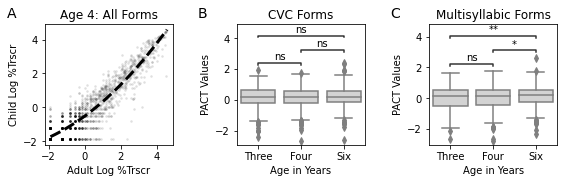

In [81]:
fig, ax = plt.subplots(1,3,figsize=(8,2.5))
alp = .05
jit = .3


# relationship with trendline
alp = .08
ax[0].scatter(x='Adult',y='Child',data=logpcts,alpha=alp,c='black',s=3)
bestx,besty = trendline(logpcts['Adult'][np.isfinite(data4['Pct Adult'])],
                        logpcts['Child'][np.isfinite(data4['Pct Adult'])],2)

ax[0].plot(bestx,besty,c='black',linestyle='--',lw=3);
ax[0].set_ylabel('Child Log %Trscr')
ax[0].set_xlabel('Adult Log %Trscr')
ax[0].set_title('Age 4: All Forms')

x = "variable"
y = "value"
order = ['Three', 'Four', 'Six']

# pact values - CVC
e2 = sns.boxplot(x='variable', y='value', data=pact_cvc_melt, ax=ax[1],
                 palette=['lightgray'])

tr = add_stat_annotation(ax[1], data=pact_cvc_melt, x=x, y=y, order=order,
                         box_pairs=[("Three", "Four"), ("Three", "Six"), ("Four", "Six")],
                         test='Wilcoxon', text_format='star',
                         loc='inside', verbose=0)

ax[1].set_ylabel('PACT Values')
ax[1].set_xlabel('Age in Years')
ax[1].set_title('CVC Forms')
#plt.close(e2.fig)
#plt.close(e3.fig)

# pact values - Multisyllabic
ax[2] = sns.boxplot(data=pact_multi_melt, x=x, y=y, order=order,palette=['lightgray'])
tr = add_stat_annotation(ax[2], data=pact_multi_melt, x=x, y=y, order=order,
                         box_pairs=[("Three", "Four"), ("Three", "Six"), ("Four", "Six")],
                         test='Wilcoxon', text_format='star',
                         loc='inside', verbose=0)



ax[2].set_ylabel('PACT Values')
ax[2].set_xlabel('Age in Years')
ax[2].set_title('Multisyllabic Forms')

yval = 5.3
ax[0].text(-4.3, yval, "A", fontsize=14)
ax[0].text(6.3, yval, "B", fontsize=14)
ax[0].text(17, yval, "C", fontsize=14)


plt.subplots_adjust(wspace=.5,left=.08,right=.97,bottom=.21)
plt.savefig(outdir/"pact_1200dpi.png")
plt.savefig(outdir/"pact_vector.svg")